# MongoDB에 저장된 IoT 데이터 시각화

## Pandas: access to the remote json from MongoDB
- The json file is generated on the fly from the express server of Node.js.
- The data retrieved from MongoDB are saved in the json file.
- The data are composed of three time series; temperature, humidity, and luminosity wuth date.


In [1]:
import pandas as pd

In [2]:
# loading json file from MongoDB via web (CORS, port=3030)
url="http://life21c.inje.ac.kr:3030/iot"
df=pd.read_json(url)
print('Large data was retrieved successfully from MongoDB!')

Large data was retrieved successfully from MongoDB!


In [3]:
df.shape, type(df)

((59807, 6), pandas.core.frame.DataFrame)

In [4]:
df.head()

,_id,date,temperature,humidity,luminosity,__v
0,655d950e626237425047ca16,2023-11-22 14:43:42.806,20.3,45.5,63,0
1,655d950e626237425047ca18,2023-11-22 14:43:42.811,20.3,45.5,63,0
2,655d950e626237425047ca17,2023-11-22 14:43:42.811,20.3,45.5,63,0
3,655d950e626237425047ca1a,2023-11-22 14:43:42.812,20.3,45.5,63,0
4,655d950e626237425047ca19,2023-11-22 14:43:42.811,20.3,45.5,63,0


In [5]:
df.tail()

,_id,date,temperature,humidity,luminosity,__v
59802,657178594c01b1f7e12a0ade,2023-12-07 16:46:33.811,22.9,25.4,0,0
59803,6571785b4c01b1f7e12a0ae0,2023-12-07 16:46:35.089,22.9,25.4,0,0
59804,6571785c4c01b1f7e12a0ae2,2023-12-07 16:46:36.089,22.9,25.4,0,0
59805,6571785d4c01b1f7e12a0ae4,2023-12-07 16:46:37.367,22.9,25.5,0,0
59806,6571785e4c01b1f7e12a0ae6,2023-12-07 16:46:38.366,22.9,25.5,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59807 entries, 0 to 59806
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   _id          59807 non-null  object        
 1   date         59807 non-null  datetime64[ns]
 2   temperature  59807 non-null  float64       
 3   humidity     59807 non-null  float64       
 4   luminosity   59807 non-null  int64         
 5   __v          59807 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 2.7+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,59807.0,19.937161,2.179066,0.2,18.0,18.6,22.5,24.1
humidity,59807.0,29.133056,4.249207,20.7,25.3,29.2,31.3,99.9
luminosity,59807.0,22.009079,30.124473,0.0,0.0,1.0,61.0,106.0
__v,59807.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


### Dataframe with date and three sensor values(temperature, humidity, luminosity)

In [8]:
iot_data = df[['date', 'temperature', 'humidity', 'luminosity']]

In [9]:
iot_data.shape

(59807, 4)

In [10]:
iot_data.head()  # date와 3 개의 신호를 확인.

,date,temperature,humidity,luminosity
0,2023-11-22 14:43:42.806,20.3,45.5,63
1,2023-11-22 14:43:42.811,20.3,45.5,63
2,2023-11-22 14:43:42.811,20.3,45.5,63
3,2023-11-22 14:43:42.812,20.3,45.5,63
4,2023-11-22 14:43:42.811,20.3,45.5,63


In [11]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59807 entries, 0 to 59806
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         59807 non-null  datetime64[ns]
 1   temperature  59807 non-null  float64       
 2   humidity     59807 non-null  float64       
 3   luminosity   59807 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 1.8 MB


In [32]:
# Save iot data in csv file.
iot_data.to_csv('iot_data_231207.csv')

<Axes: title={'center': 'Boxplot of temperature, humidity, and luminosity'}>

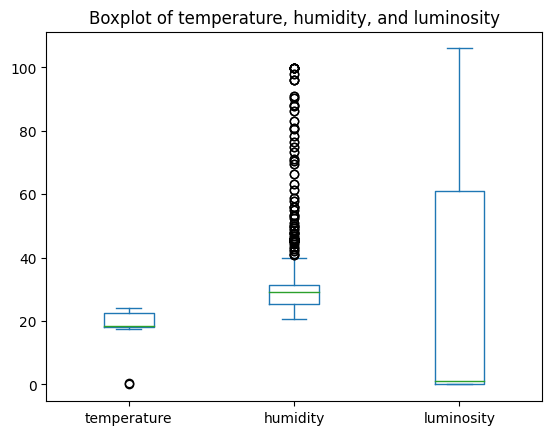

In [33]:
# Plot boxplot
iot_data[['temperature','humidity','luminosity']].plot.box(title='Boxplot of temperature, humidity, and luminosity')
# iot_data.loc[:,'temperature':'luminosity'].plot.box(title='Boxplot of temperature, humidity, and luminosity')
# iot_data.iloc[:,1:].plot.box(title='Boxplot of temperature, humidity, and luminosity')

### Plot time series of sensor data

<Axes: title={'center': 'temperature'}, xlabel='date'>

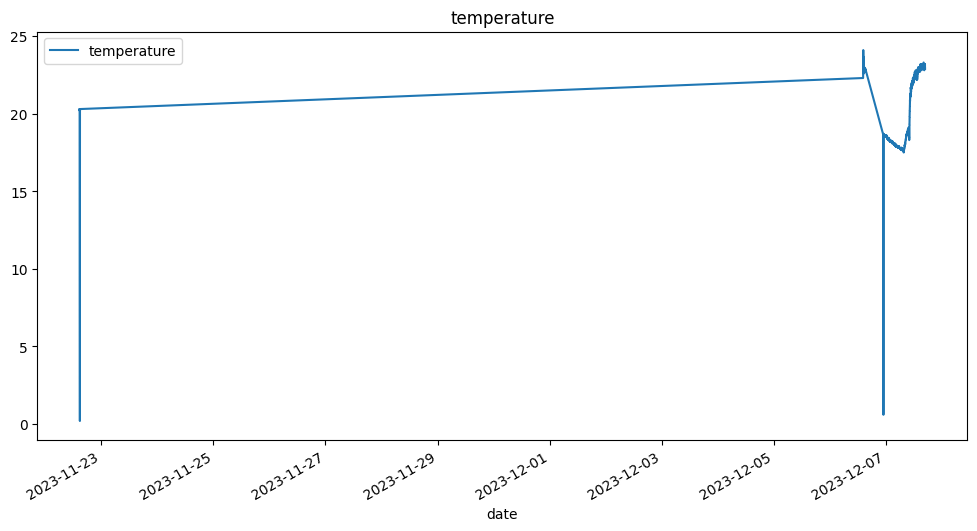

In [14]:
iot_data.plot(x='date', y='temperature', figsize=(12,6), title='temperature')

<Axes: title={'center': 'humidity'}, xlabel='date'>

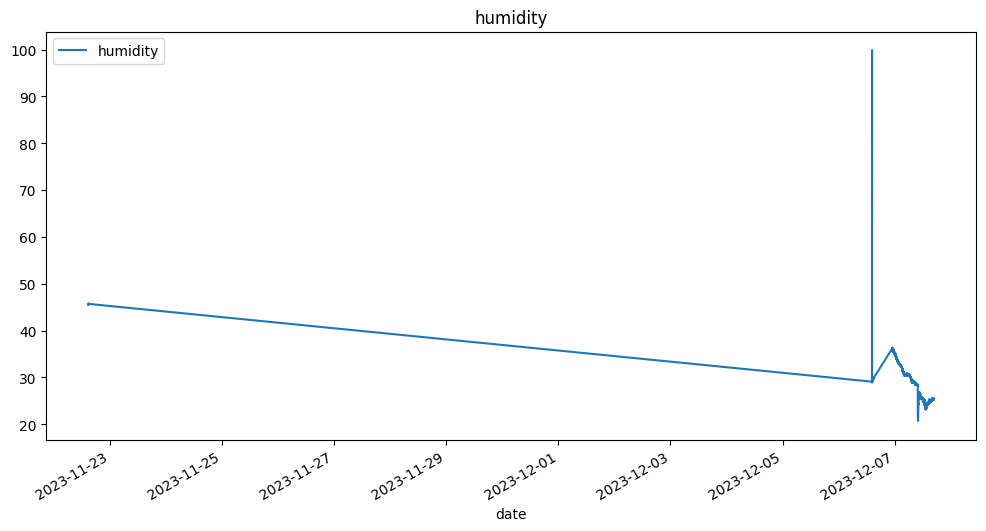

In [15]:
iot_data.plot(x='date', y='humidity', figsize=(12,6), title='humidity')

<Axes: title={'center': 'luminosity'}, xlabel='date'>

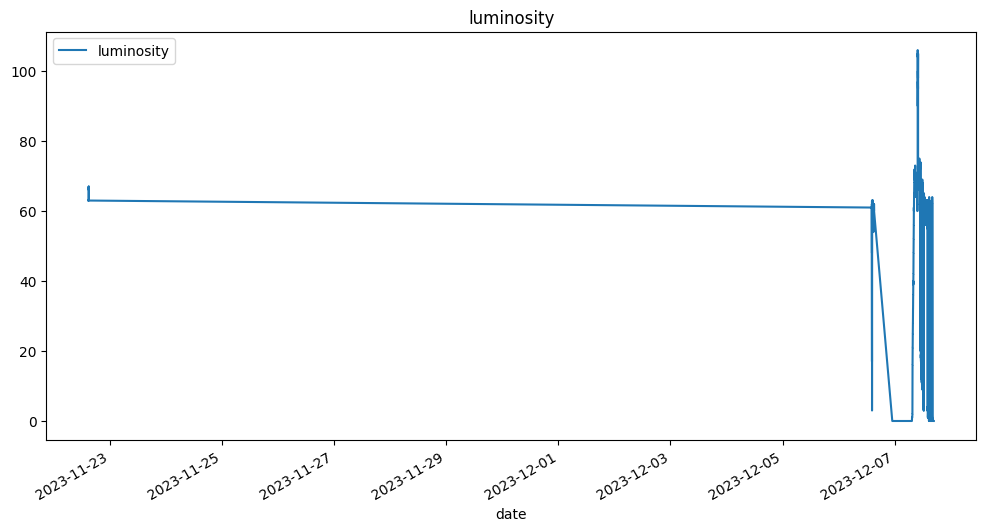

In [16]:
iot_data.plot(x='date', y='luminosity', figsize=(12,6), title='luminosity')

#### 다중그래프 (multiple fgraphs)

<Axes: title={'center': 'temperature and humidity'}, xlabel='date'>

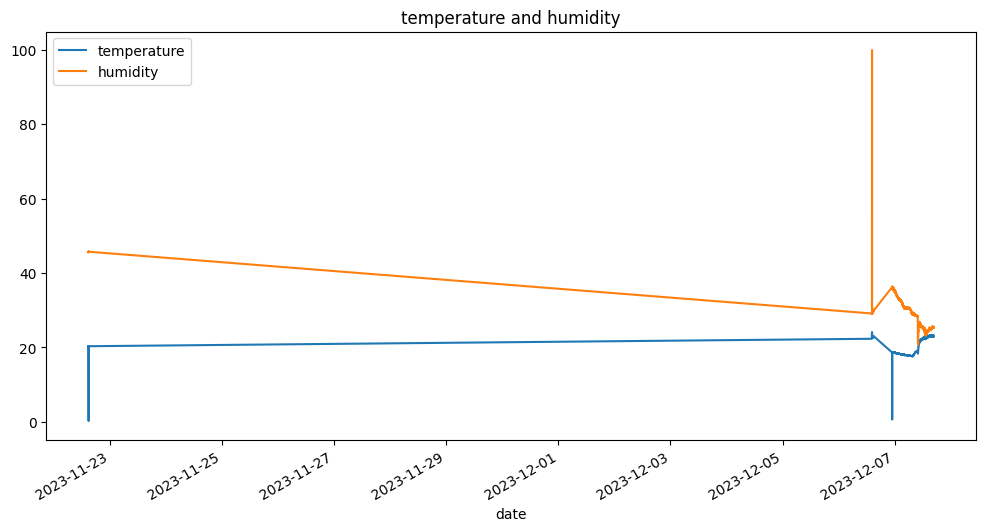

In [17]:
# Plot of ['temperature','humidity']
iot_data.plot(x='date', y=['temperature','humidity'], figsize=(12,6), title='temperature and humidity')

<Axes: title={'center': 'temperature, humidity, and luminosity'}, xlabel='date'>

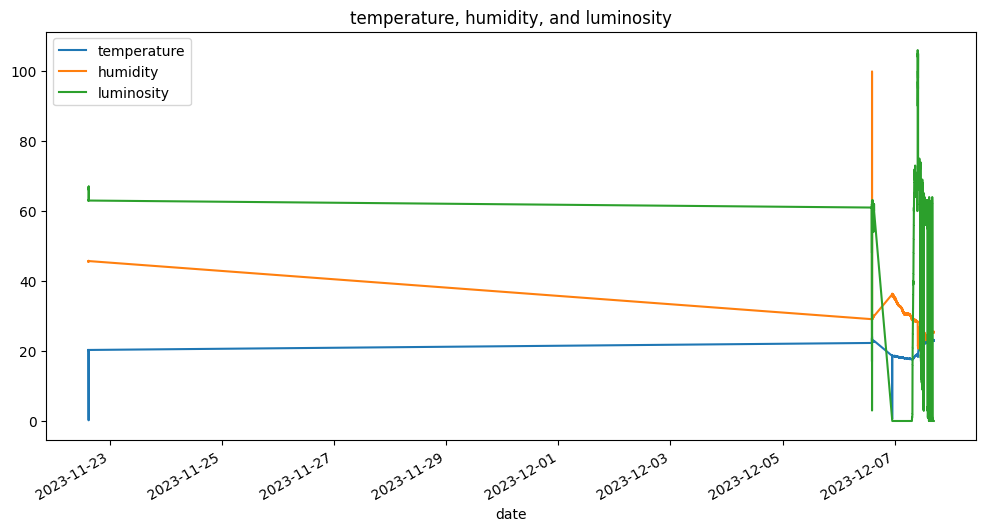

In [18]:
# Plot of ['temperature','humidity','luminosity']
iot_data.plot(x='date', y=['temperature','humidity','luminosity'], figsize=(12,6),
             title='temperature, humidity, and luminosity')

#### Plot the mean of sensor data

In [19]:
iot_data[['temperature','humidity','luminosity']].mean()

temperature    19.937161
humidity       29.133056
luminosity     22.009079
dtype: float64

<Axes: title={'center': 'Mean of temperature, humidity, and luminosity'}>

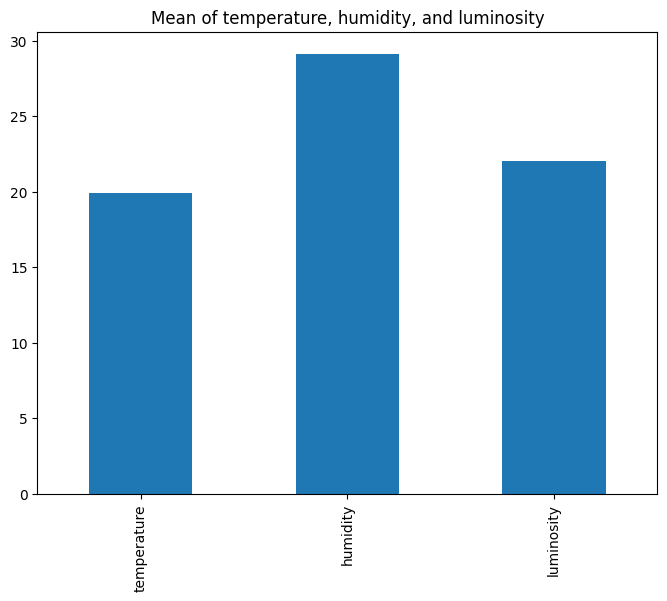

In [20]:
iot_data[['temperature','humidity','luminosity']].mean().plot.bar(figsize=(8,6),
                                                                  title="Mean of temperature, humidity, and luminosity")

### Plot the change of sensor data over various time spans.

> time span: 60 sec, 1 hour, 1 day, 1 week

#### Set date as index of timestamp

In [21]:
iot_data.set_index('date',inplace=True)

In [22]:
iot_data.info() # timestamp index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59807 entries, 2023-11-22 14:43:42.806000 to 2023-12-07 16:46:38.366000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  59807 non-null  float64
 1   humidity     59807 non-null  float64
 2   luminosity   59807 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 1.8 MB


In [23]:
iot_data.head()

,temperature,humidity,luminosity
date,,,
2023-11-22 14:43:42.806,20.3,45.5,63
2023-11-22 14:43:42.811,20.3,45.5,63
2023-11-22 14:43:42.811,20.3,45.5,63
2023-11-22 14:43:42.812,20.3,45.5,63
2023-11-22 14:43:42.811,20.3,45.5,63


In [24]:
# Estimate the mean of the iot data for every minute
iot_data.resample('60S').mean()

,temperature,humidity,luminosity
date,,,
2023-11-22 14:43:00,20.293548,45.525806,63.0
2023-11-22 14:44:00,20.293333,45.596667,63.0
2023-11-22 14:45:00,20.287500,45.612500,63.0
2023-11-22 14:46:00,NaN,NaN,NaN
2023-11-22 14:47:00,NaN,NaN,NaN
...,...,...,...
2023-12-07 16:42:00,23.137736,25.226415,0.0
2023-12-07 16:43:00,23.173077,25.269231,0.0
2023-12-07 16:44:00,23.105660,25.290566,0.0


<Axes: title={'center': 'Minutely change of temperature, humidity, and luminosity'}, xlabel='date'>

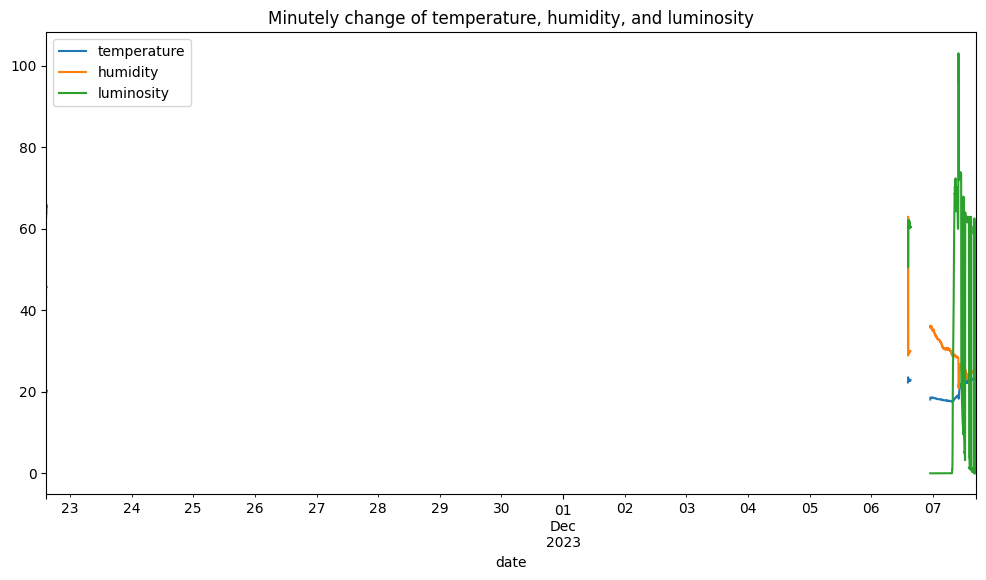

In [25]:
#  Plot mean of the iot data per every minute
iot_data.resample('60S').mean().plot(figsize=(12,6),
                                     title='Minutely change of temperature, humidity, and luminosity')

In [26]:
# Estimate the mean of iot data for every hour
iot_data.resample('H').mean()  # mean per each hour

,temperature,humidity,luminosity
date,,,
2023-11-22 14:00:00,20.219185,45.655396,64.326139
2023-11-22 15:00:00,NaN,NaN,NaN
2023-11-22 16:00:00,NaN,NaN,NaN
2023-11-22 17:00:00,NaN,NaN,NaN
2023-11-22 18:00:00,NaN,NaN,NaN
...,...,...,...
2023-12-07 12:00:00,22.476178,24.863524,34.422651
2023-12-07 13:00:00,22.565707,23.825308,62.397343
2023-12-07 14:00:00,22.931392,24.538987,11.656329


<Axes: title={'center': 'Hourly change of temperature, humidity, and luminosity'}, xlabel='date'>

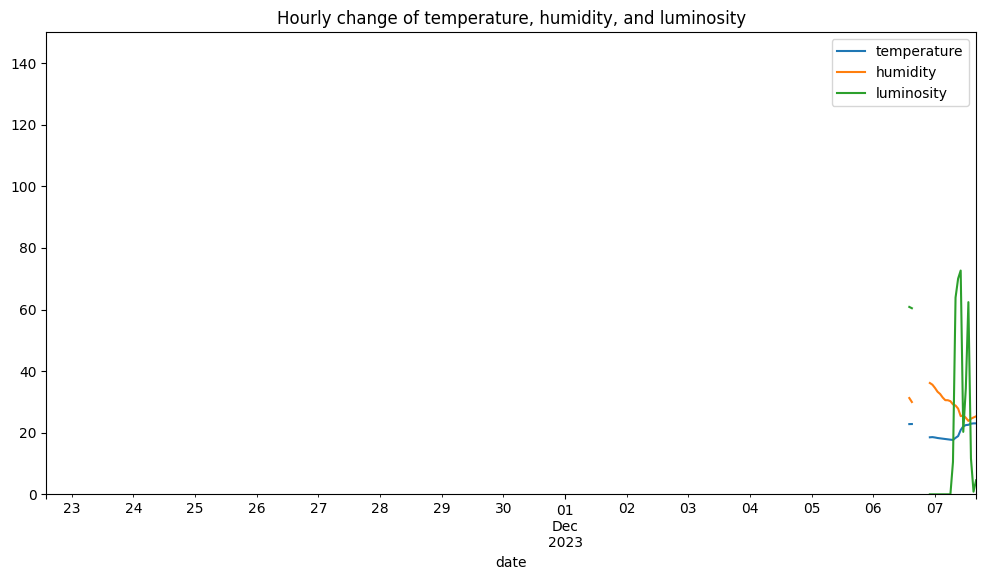

In [27]:
#  Plot mean of the iot data per every hour
iot_data.resample('H').mean().plot(figsize=(12,6),
                                   title='Hourly change of temperature, humidity, and luminosity',
                                   ylim=[0,150])

In [28]:
# Estimate the mean of iot data for every day
iot_data.resample('D').mean()

,temperature,humidity,luminosity
date,,,
2023-11-22,20.219185,45.655396,64.326139
2023-11-23,NaN,NaN,NaN
2023-11-24,NaN,NaN,NaN
2023-11-25,NaN,NaN,NaN
2023-11-26,NaN,NaN,NaN
2023-11-27,NaN,NaN,NaN
2023-11-28,NaN,NaN,NaN
2023-11-29,NaN,NaN,NaN
2023-11-30,NaN,NaN,NaN


<Axes: title={'center': 'Daily change of temperature, humidity, and luminosity'}, xlabel='date'>

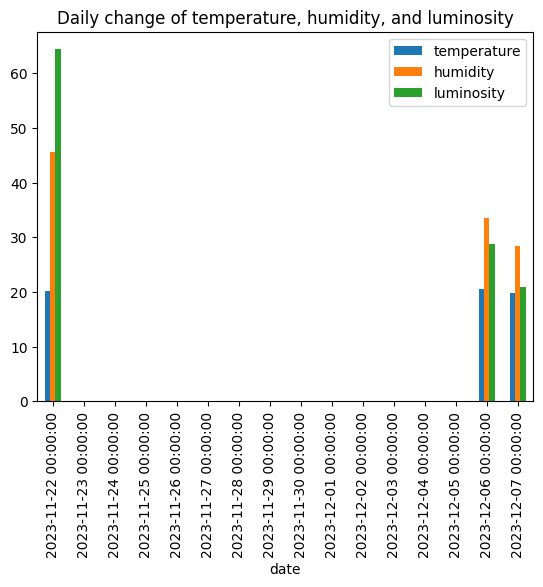

In [29]:
#  Plot mean of the iot data per every day
iot_data.resample('D').mean().plot(kind='bar', #marker='o', ms=6, figsize=(12,6),
                                   title='Daily change of temperature, humidity, and luminosity')

In [30]:
# Estimate the mean of iot data for every week
iot_data.resample('W').mean()

,temperature,humidity,luminosity
date,,,
2023-11-26,20.219185,45.655396,64.326139
2023-12-03,NaN,NaN,NaN
2023-12-10,19.935181,29.017047,21.711955


<Axes: title={'center': 'Weekly change of temperature, humidity, and luminosity'}, xlabel='date'>

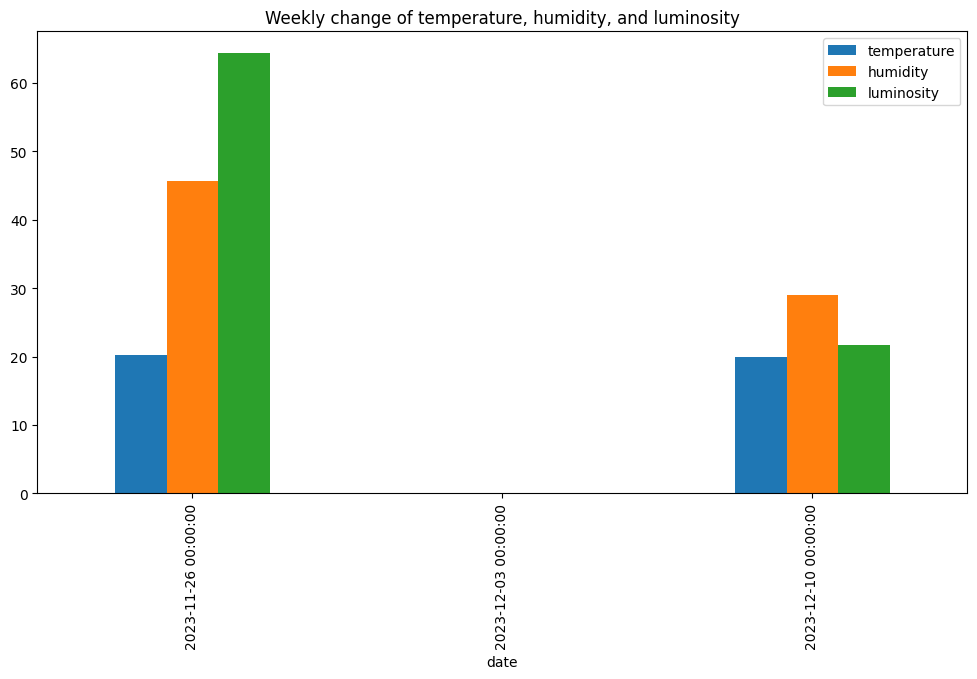

In [31]:
#  Plot mean of the iot data per every week
iot_data.resample('W').mean().plot(kind='bar', #marker='o', ms=10,
                                   figsize=(12,6),
                                   title='Weekly change of temperature, humidity, and luminosity')

## 와, Great!

---